# **UTS**

Lakukan analisa terhadap data pada  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra  dengan menggunakan klasifikasi

- metode Naive Bayes Classifier

- metode pohon keputusan (Desision tree)

Proses analisa dilaporkan dan diupload di github ( menggunakan jupyter book)

**METODE NAIVE BAYES CLASSIFIER**

Naive Bayes adalah algoritma machine learning untuk masalah klasifikasi. Ini didasarkan pada teorema probabilitas Bayes. Hal ini digunakan untuk klasifikasi teks yang melibatkan set data pelatihan dimensi tinggi. Beberapa contohnya adalah penyaringan spam, analisis sentimental, dan klasifikasi artikel berita.

Algoritma Naive Bayes adalah teknik klasifikasi berdasarkan penerapan teorema Bayes

dengan asumsi kuat bahwa semua prediktor independen satu sama lain. Secara sederhana dengan kata lain, asumsinya adalah bahwa kehadiran fitur di kelas tidak tergantung pada kehadiran fitur lain di kelas yang sama.

In [17]:
# Naive Bayes Classification
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [18]:
# Importing the dataset
url = 'https://raw.githubusercontent.com/FirdatulFitriyah/datamining/main/dataR2.csv'
dataset = pd.read_csv(url)

In [19]:
#looking at the first 5 values of the dataset
dataset.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [20]:
#Spliting the dataset in independent and dependent variables
X = dataset.iloc[:,:4].values
y = dataset['Classification'].values

In [21]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [22]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [24]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2 2]


In [25]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([[2, 1],
       [1, 1],
       [2, 1],
       [2, 1],
       [1, 1]])

In [26]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  1]
 [ 9  4]]


In [27]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum())) 

Correct predictions:  14
False predictions 10


Accuracy of the Naive Bayes Clasification is:  0.5833333333333334


**METODE POHON KEPUTUSAN (DESISION TREE)**

Secara konsep, Pohon Keputusan merupakan salah satu teknik dari Analisis Keputusan (Decision Analysis).Definisi yang paling sederhana mengenai apa itu Pohon Keputusan, adalahdiagram analisis yang dapat membantu pengambil keputusan ketika menghadapi beberapa opsi dengan cara memproyeksikan hasil yang mungkin terjadi. Pohon tersebut juga memperlihatkan faktor-faktor kemungkinan/ probablitas yang akan mempengaruhi alternatif-alternatif keputusan tersebut, disertai dengan estimasi hasil akhir yang akan didapat bila kita mengambil alternatif keputusan tersebut.

Definisi teknis yang diambil dari beberapa buku Manajemen Operasional, bahwa Pohon Keputusan merupakan “Model alternatif pilihan yang tersedia bagi pengambil keputusan, beserta kemungkinan konsekuensinya.” Pohon keputusan dapat digunakan saat membuat berbagai pilihan, mulai dari keputusan yang paling sederhana sampai yang sangat yang rumit. Konsep dari pohon keputusan adalah mengubah data menjadi pohon keputusan dan aturan-aturan keputusan. Pohon keputusan memadukan antara eksplorasi data dan pemodelan, sehingga sangat bagus sebagai langkah awal dalam proses pemodelan bahkan ketika dijadikan sebagai model akhir dari beberapa teknik lain.

**Rumus Gini Index:**
$$
Gini Index = 1-Σ_i^n (P_i)^2
$$

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns

url = 'https://raw.githubusercontent.com/FirdatulFitriyah/datamining/main/dataR2.csv'
data = pd.read_csv(url)

In [14]:
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [15]:
y = data["Classification"]
X = data.drop(columns=["Classification"])
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X, y)

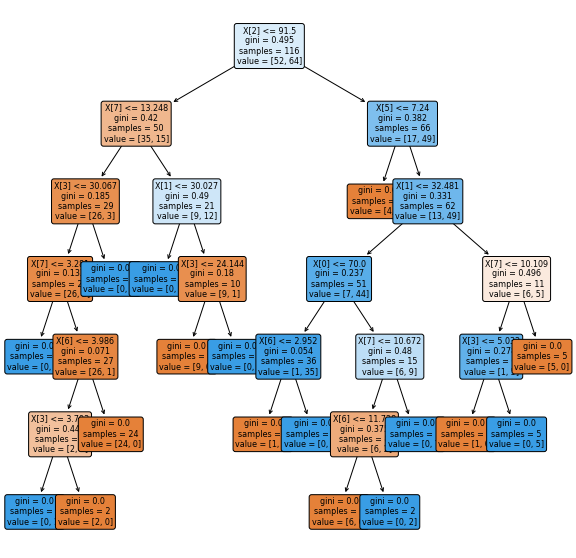

In [16]:
#plt the figure, setting a black background
plt.figure(figsize=(10,10))
#create the tree plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#show the plot
plt.show()